In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.colors
import os
import numpy as np
import math
import cmath

In [2]:
paths = dict([(a,"/home/jsk/cylinder/fixed_surfaces/n1k6a"+str(a)) for a in range(10)])

Loading data for a seried of (alpha x c) arrays with on varying shape amplitudes a, with fixed short wavelength (longer cylinder) k=.6.

In [3]:
alphas =[x for x in range(-5,2)]
cs =[x for x in np.arange(.5,9,1)]

In [4]:
def sort_csv(filename, dtype=float, fct=(lambda x: abs(x))):
    if dtype==complex:
        dtype = str
        data=pd.read_csv(filename, index_col=0)
        data=data.applymap(complex)
        data=data.applymap(lambda x: fct(x))
    else:
        data=pd.read_csv(filename, index_col=0, dtype=dtype)
    data.columns = data.columns.astype("float")
    data.index = data.index.astype("float")
    pd.DataFrame.sort_index(data, axis=0, inplace=True)
    pd.DataFrame.sort_index(data, axis=1, inplace=True)
    return data


In [5]:
def complex_array_to_rgb(X, theme='dark', rmax=None):
    '''Takes an array of complex number and converts it to an array of [r, g, b],
    where phase gives hue and saturaton/value are given by the absolute value.
    Especially for use with imshow for complex plots.'''
    absmax = rmax or np.abs(X).max()
    Y = np.zeros(X.shape + (3,), dtype='float')
    Y[..., 0] = np.angle(X) / (2 * math.pi) % 1
    if theme == 'light':
        Y[..., 1] = np.clip(np.abs(X) / absmax, 0, 1)
        Y[..., 2] = 1
    elif theme == 'dark':
        Y[..., 1] = 1
        Y[..., 2] = np.clip(np.abs(X) / absmax, 0, 1)
    Y = matplotlib.colors.hsv_to_rgb(Y)
    return Y

def complex_heatmap(filename, theme='dark', rmax=None):
    data=pd.read_csv(filename, index_col=0)
    data.columns = data.columns.astype("float")
    data.index = data.index.astype("float")
    pd.DataFrame.sort_index(data, axis=0, inplace=True)
    pd.DataFrame.sort_index(data, axis=1, inplace=True)
    data=data.applymap(complex)
    plt.imshow(complex_array_to_rgb(data, theme, rmax))
    
def complex_heatmap_2(filename, theme='dark', rmax=None):
    data=pd.read_csv(filename, index_col=0)
    data.columns = data.columns.astype("float")
    data.index = data.index.astype("float")
    pd.DataFrame.sort_index(data, axis=0, inplace=True)
    pd.DataFrame.sort_index(data, axis=1, inplace=True)
    data=data.applymap(complex)
    return data.transpose()

In [6]:
field_energies = dict([(a,sort_csv(os.path.join(paths[a], "field_energy.csv"), dtype=complex)) for a in paths])

In [7]:
minimum_as = dict([])
minimum_Es = dict([])
for alpha in alphas:
    minimum_as_row = dict([])
    minimum_Es_row = dict([])
    for c in cs:
        energies = [(field_energies[a].loc[c, alpha],a) for a in paths]
        energy, a = min(energies)
        minimum_as_row[c]= a
        minimum_Es_row[c] = energy
    minimum_as[alpha]=minimum_as_row
    minimum_Es[alpha] = minimum_Es_row
minimum_as = pd.DataFrame(minimum_as)
minimum_Es = pd.DataFrame(minimum_Es)

<AxesSubplot:>

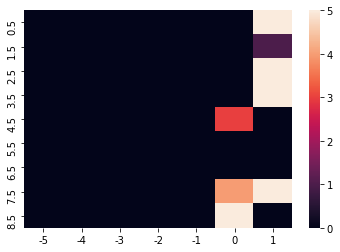

In [8]:
sb.heatmap(minimum_as)

<AxesSubplot:>

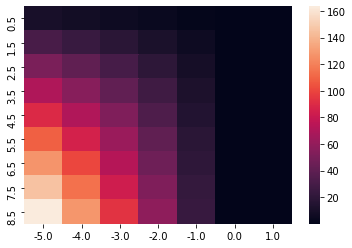

In [9]:
sb.heatmap(field_energies[6])

<AxesSubplot:>

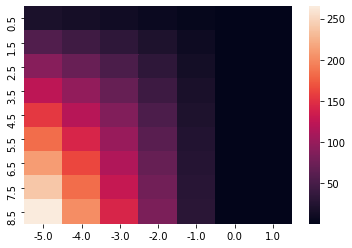

In [10]:
sb.heatmap(field_energies[8])

<AxesSubplot:>

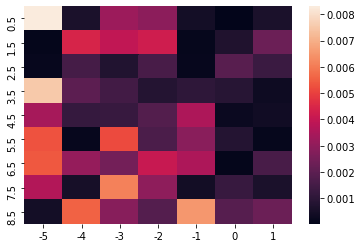

In [11]:
sb.heatmap(minimum_Es)

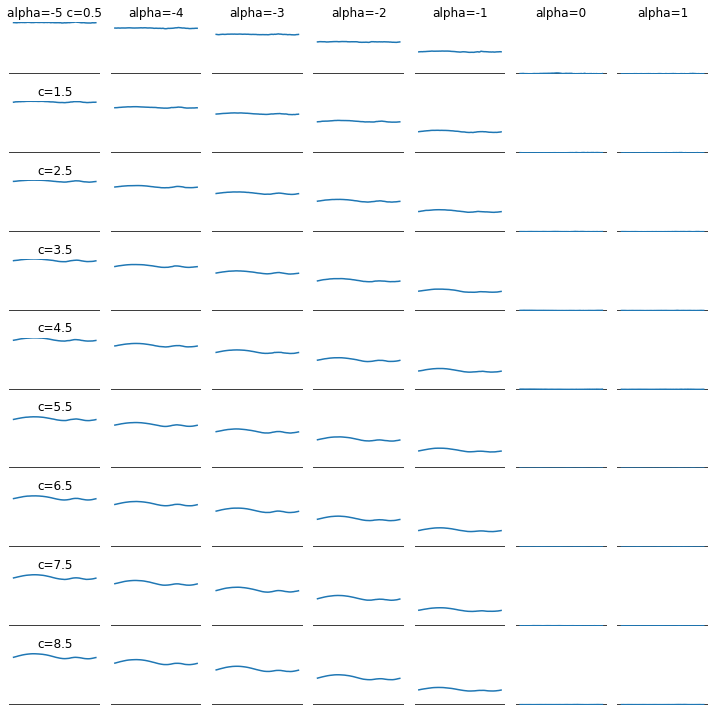

In [12]:
nrows, ncols = field_energies[9].shape
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharex=False, figsize=(10,10))

a=6

for ax, params in zip(axs.flat, [(alpha,c) for c in cs for alpha in alphas ]):
    alpha,c= params
    #print(params)
    filename="alpha_"+str(round(alpha,2))+".0_C_"+str(round(c,2))+"_profile_abs.csv"
    #print(filename)
    profile= pd.read_csv(os.path.join(paths[a], filename), index_col=0)
    ax.set_ylim((0,math.sqrt(5)))
    ax.axis('off')
    ax.axhline(y=0, color='black')
    ax.plot(profile)
    if c==cs[0]:
        ax.set_title("alpha="+str(alpha))
        if alpha==alphas[0]:
            ax.set_title("alpha="+str(alpha)+" c="+str(c))
    elif alpha==alphas[0]:
        ax.set_title("c="+str(c))
    #plt.show()

plt.tight_layout()
#pp.savefig()
#plt.show()
#pp.close()
#plt.savefig("profiles_example_k1a8.png")

Field profiles for an array of values (alpha x c), on fixed surfaces k=0.6, a=0.6.

In [13]:
#entering states by hand
descriptions = dict([])
descriptions[9] = [[2,2,2,2,2,'x','x'], [2,2,2,2,'x','x','x'],
                  [2,2,2,'x','x','x','x'], [2,2,'x','x','x','x','x'],
                   [2,'x','x','x','x','x','x'], ['x','x','x','x','x','x','x'],
                   ['x','x','x','x','x','x','x'], ['x','x','x','x','x','x','x'],  
                   ['x','x','x','x','x','x','x']]
descriptions[7] = [[2,2,2,2,2,'x','x'], [2,2,2,2,'x','x','x'],
                  [2,2,2,'x','x','x','x'], [2,2,'x','x','x','x','x'],
                   ['x','x','x','x','x','x','x'], ['x','x','x','x','x','x','x'],
                   ['x','x','x','x','x','x','x'], ['x','x','x','x','x','x','x'],  
                   ['x','x','x','x','x','x','x']] #these all more complicated (2,0*,2,0)
descriptions[6] = [[0,1,2,2,2,'x','x'], [2,2,2,2,'x','x','x'],
                  [2,2,2,'x','x','x','x'], [2,2,'x','x','x','x','x'],
                   [1,'x','x','x','x','x','x'], ['x','x','x','x','x','x','x'],
                   ['x','x','x','x','x','x','x'], ['x','x','x','x','x','x','x'],  
                   ['x','x','x','x','x','x','x']]
descriptions[5] = [[0,0,0,1,1,'x','x'], [1,(1,2),1,1,'x','x','x'], #but field eergies still decreasing
                  [1,1,0,'x','x','x','x'], [0,0,'x','x','x','x','x'],
                   [0,'x','x','x','x','x','x'], ['x','x','x','x','x','x','x'],
                   ['x','x','x','x','x','x','x'], ['x','x','x','x','x','x','x'],  
                   ['x','x','x','x','x','x','x']] #:(
descriptions[4] = [[0,0,0,0,(1,0),'x','x'], [0,0,0,0,'x','x','x'],
                  [0,0,0,0,'x','x','x'], [0,0,0,'x','x','x','x'],
                   [0,0,'x','x','x','x','x'], [0,0,'x','x','x','x','x'],
                   [0,'x','x','x','x','x','x'], [0,'x','x','x','x','x','x'],  
                   ['x','x','x','x','x','x','x']]
descriptions[3] = [[0,0,0,0,0,'x','x'], [0,0,0,0,0,'x','x'],
                  [0,0,0,0,'x','x','x'], [0,0,0,0,'x','x','x'],
                   [0,0,0,'x','x','x','x'], [0,0,0,'x','x','x','x'],
                   [0,0,'x','x','x','x','x'], [0,0,'x','x','x','x','x'],  
                   [0,'x','x','x','x','x','x']]

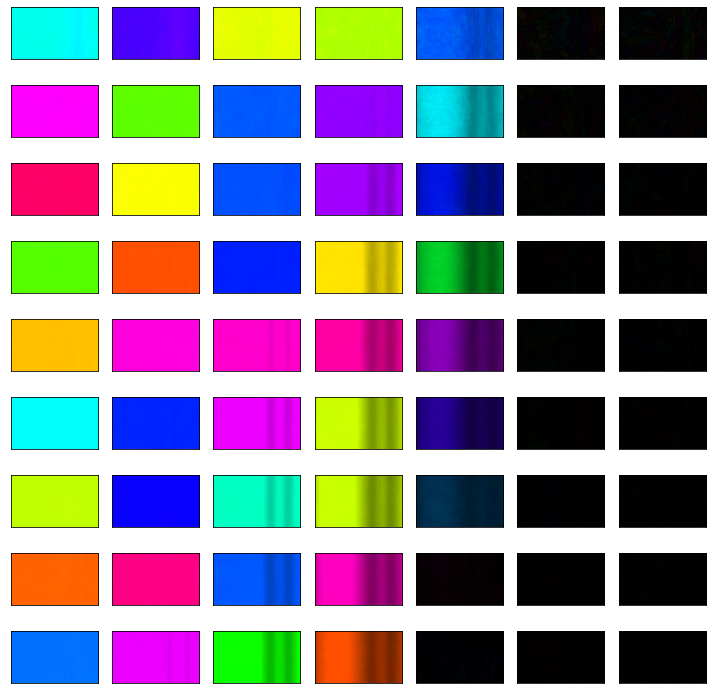

In [16]:
nrows, ncols = field_energies[9].shape
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharex=False, figsize=(10,10))

a=9

for ax, params in zip(axs.flat, [(alpha,c) for c in cs for alpha in alphas]):
    alpha,c= params
    #print(params)
    try:
        filename=os.path.join(paths[a], "alpha_"+str(round(alpha,2))+".0_C_"+str(round(c,2))+"_snapshot.csv")
        #print(filename)
        heatmap= complex_heatmap_2(filename)
        ax.imshow(complex_array_to_rgb(heatmap, theme='dark', rmax=1))
    except FileNotFoundError:
        pass
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

plt.tight_layout()
#pp.savefig()
#plt.show()
#pp.close()
#plt.savefig("complex_examples_k10a8.png")

Corresponding field final snapshots. 

Text(33.0, 0.5, 'c')

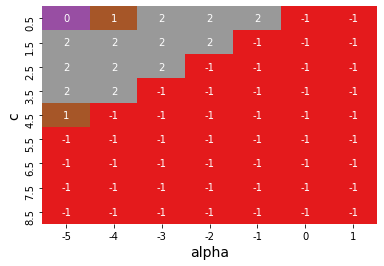

In [86]:
def labels_to_number(arr):
    ans=np.zeros((len(arr), len(arr[0])))
    for (i,row) in enumerate(arr):
        for (j,d) in enumerate(row):
            if d=='x':
                ans[i,j]=-1
            elif type(d)==tuple:
                ans[i,j]=(d[0]+d[1])/2
            else:
                ans[i,j]=d
    return pd.DataFrame(ans, index=np.arange(0.5, 9,1), columns=range(-5,2))
sb.heatmap(labels_to_number(descriptions[6]), annot=True, cbar=False, cmap='Set1')
plt.xlabel("alpha", fontsize=14)
plt.ylabel("c", fontsize=14)
#plt.savefig("descriptions_example_k10a8.png")

Descriptions in terms of maximum rotational state observed, but field is no longer uniformly in this roational state over the whole cylinder.  For shorter wavelength field configuration is not adequately desscribed by a single number N.

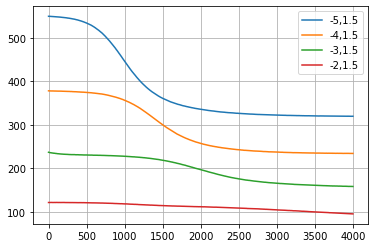

In [76]:
p=paths[7]
subject="field_energy"
for alpha in alphas[:-3]:
    for c in cs[1:2]:
        try:
            time_data= pd.read_csv(p+"/alpha_"+str(alpha)+".0_C_"+str(c)+".csv")
            plt.plot([complex(x).real for x in time_data.loc[1000:,subject]], label=str(alpha)+','+str(c))
        except FileNotFoundError:
            print(p+"/alpha_"+str(alpha)+".0_C_"+str(c)+".csv")
            pass
plt.grid(True)
plt.legend()
plt.show()

After 50000 simulation steps, energy is still slightly decreasing in some cases where field is uneven, but the multi-banded pattern is probably the final minimum.

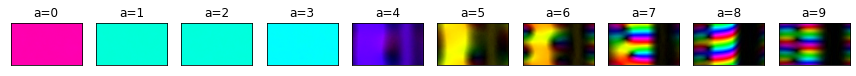

In [87]:
nrows, ncols = 1, 10
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharex=False, figsize=(12,4))

alpha=-4
c=3.5

for ax, params in zip(axs.flat, [a for a in range(10)]):
    a=params
    try:
        filename=os.path.join(paths[a], "alpha_"+str(round(alpha,2))+".0_C_"+str(round(c,2))+"_snapshot.csv")
        #print(filename)
        heatmap= complex_heatmap_2(filename)
        ax.imshow(complex_array_to_rgb(heatmap, theme='dark', rmax=1))
        ax.set_title("a="+str(a))
    except FileNotFoundError:
        filename=os.path.join(paths[a], "alpha_"+str(round(alpha,2))+".0_C_"+str(round(c,2))+"_snapshot.csv")
        print(filename)
        pass
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

plt.tight_layout()
#pp.savefig()
#plt.title("Patterns for varying shape amplitude at k=1, alpha=-5, c=1.5")
#plt.show()
#plt.savefig("pattterns_k1alpha-4c3p5.png")

Text(0.5, 0, 'a')

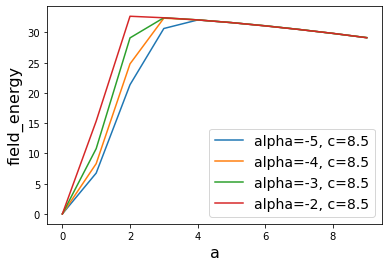

In [18]:
a_s = range(10)
for alpha,c in [(-5, 8.5),(-4,8.5), (-3, 8.5), (-2, 8.5)]:
    plt.plot(a_s, [field_energies[a].loc[c,alpha]/alpha**2 for a in a_s], label="alpha="+str(alpha)+", c="+str(c))
plt.legend(fontsize=14)
plt.ylabel("field_energy", fontsize=16)
plt.xlabel("a", fontsize=16)
#plt.savefig("field_energies_example.png")

These simulations allow us to obtain a sketch of field-related potential H_I(a) for each k,alpha,c,n.  Its global minimum is always an ordered field on a flat cylinder |a|=0, but for more curved cases (k<1), the field can adjust and system energy decreases energy on higher shape amplitudes a.

To this we will add the 'external' potential terms from surface tension and bending rigidity, which can have a minimum at |a|=0, |a|=1, or any intermediate |a|.